In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('calories.csv')

In [3]:
df = df.dropna(axis= 0 )

In [4]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60.0,110,130,409.1
1,60.0,117,145,479.0
2,60.0,103,135,340.0
3,45.0,109,175,282.4
4,45.0,117,148,406.0


In [5]:
y = df.iloc[:,-1]

<Axes: >

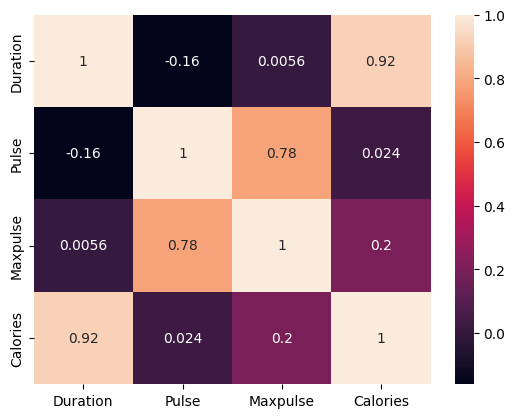

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
x = df['Duration']

In [8]:
x = pd.DataFrame(np.array(x).reshape(-1,1))

In [9]:
y

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 163, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [12]:
LR = LinearRegression()

In [13]:
LR.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = LR.predict(x_test)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MAE 77.13815830562996
RMSE 137.59804446571323
R2 0.8378079275531995


<Axes: xlabel='0', ylabel='Calories'>

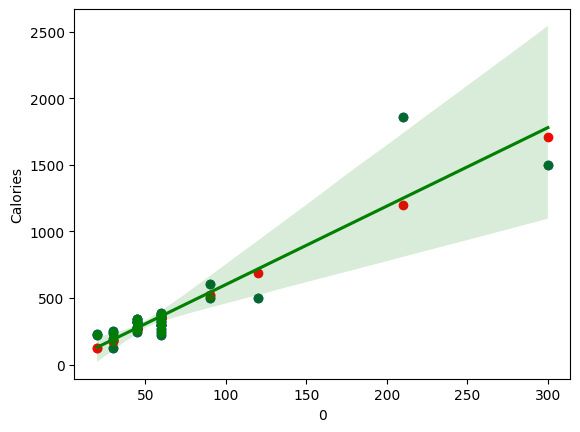

In [49]:
plt.scatter(x_test, y_test, c = 'b')
plt.scatter(x_test, y_pred, c = 'r')
sns.regplot(x = x_test, y = y_test, color = 'green')

In [51]:
LR.predict([[150]])

array([857.91902392])

In [76]:
diabeties = pd.read_csv('diabetes_prediction_dataset.csv')

In [77]:
diabeties.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [78]:
diabeties.drop(['gender','smoking_history','diabetes','hypertension','heart_disease'], axis=1,inplace=True)

In [66]:
y = diabeties.iloc[:,-1]
diabeties.drop('blood_glucose_level',axis=1,inplace=True)

In [67]:
x = diabeties

In [68]:
x.head()

,age,bmi,HbA1c_level
0,80.0,25.19,6.6
1,54.0,27.32,6.6
2,28.0,27.32,5.7
3,36.0,23.45,5.0
4,76.0,20.14,4.8


In [69]:
y

0        140
1         80
2        158
3        155
4        155
        ... 
99995     90
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 100000, dtype: int64

<Axes: >

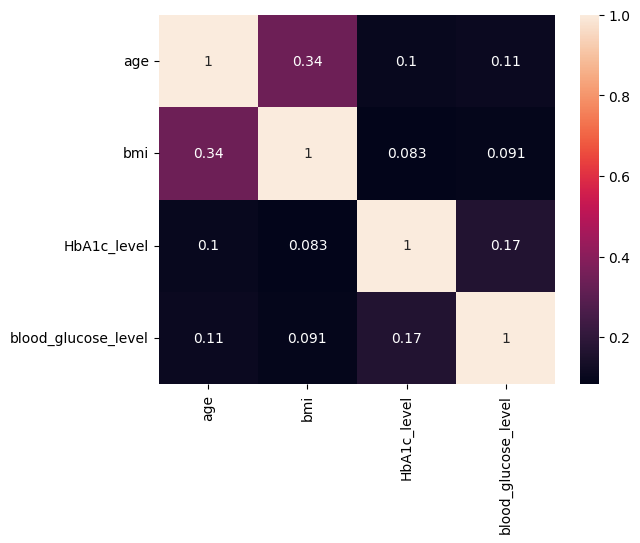

In [79]:
sns.heatmap(diabeties.corr(),annot=True)

In [71]:
new_LR = LinearRegression()

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
new_LR.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred = new_LR.predict(x_test)

In [75]:
print("R2:",r2_score(y_test,y_pred))

R2: 0.03986754578934726


In [6]:
df  = sns.load_dataset('iris')

In [10]:
df['species'] = df.species.map({'setosa':1, 'versicolor':2, 'virginica':3})

<Axes: >

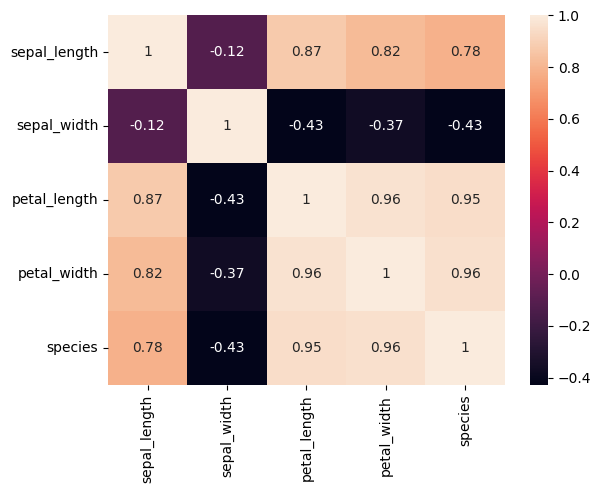

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
iris_lr = LinearRegression()

In [16]:
iris_x_train,iris_x_test,iris_y_train,iris_y_test = train_test_split(df.iloc[:,0:-2],df.iloc[:,-2],test_size=0.25,random_state=42)

In [17]:
iris_lr.fit(iris_x_train,iris_y_train)

LinearRegression()

In [18]:
iris_train_pred = iris_lr.predict(iris_x_train)

In [20]:
print("Train R2 score:",r2_score(iris_y_train,iris_train_pred))

Train R2 score: 0.9373726723453231


In [19]:
iris_test_pred = iris_lr.predict(iris_x_test)

In [21]:
print("Train R2 score:",r2_score(iris_y_test,iris_test_pred))

Train R2 score: 0.9368671270670573


In [22]:
from sklearn.linear_model import Ridge

In [39]:
iris_Ridge = Ridge(alpha=0.5,random_state=42)

In [40]:
iris_Ridge.fit(iris_x_train,iris_y_train)

Ridge(alpha=0.5, random_state=42)

In [41]:
iris_train_pred_r = iris_Ridge.predict(iris_x_train)

In [42]:
print("Train Ridge R2 Score:",r2_score(iris_y_train,iris_train_pred_r))

Train Ridge R2 Score: 0.9372417905712905


In [43]:
cellDF = pd.read_csv('Datasets/Cellphone.csv')

In [44]:
cellDF.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [45]:
cellDF.drop('Product_id',axis=1,inplace=True)

In [46]:
x = cellDF.iloc[:,1:]
y = cellDF.iloc[:,0]

In [47]:
x.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [48]:
c_x_trail,c_x_test,c_y_trail,c_y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
c_LR = LinearRegression()

In [50]:
c_LR.fit(c_x_trail,c_y_trail)

LinearRegression()

In [51]:
c_pred_train = c_LR.predict(c_x_trail)
c_pred_test = c_LR.predict(c_x_test)

In [52]:

print("Train R2:",r2_score(c_y_trail,c_pred_train))
print("Test R2:",r2_score(c_y_test,c_pred_test))

Train R2: 0.9516006085915757
Test R2: 0.9614025134850802


In [53]:
c_RR = Ridge()

In [54]:
from sklearn.model_selection import GridSearchCV

In [67]:
param = {
    'alpha':[1,2,3,6,8,9,10],
}
c_Grid = GridSearchCV(estimator=c_RR, param_grid=param, scoring='r2')

In [68]:
c_Grid.fit(c_x_trail,c_y_trail)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 6, 8, 9, 10]},
             scoring='r2')

In [69]:
c_Grid.best_params_

{'alpha': 8}

In [71]:
c_Grid.best_score_

np.float64(0.928708935837428)